### Import

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dataset

In [39]:
X = np.random.randint(2, size = (2, 400)) # creo una matrice con due numeri (0,1), su 2 colonne e 5 linee
Y = np.logical_xor(X[0],X[1]) # creo delle coppie tra le due linee della matrice X (restituisci True se "or" is True)
Y = Y.reshape(1,X.shape[1])*1 # forziamo la macchina a capire che per l'output voglio una linea e 5 colonne. Moltiplico per 1 per trsaformare True et False en 0 et 1

#print(X)
print(f"X.shape = {X.shape}")
# print(Y)
print(f"Y.shape = {Y.shape}")

X.shape = (2, 400)
Y.shape = (1, 400)


### Initialisation des parametres

In [80]:
def init_params(layer_dims):
    
    """ Generalized initialization for L layers;
    
    Creation d'un dictionaire "params" qui contient nos parametres (w,b)
    w : weight initialisés random
    b : bias initialisés à zero
    
    """

    params = {}
    for i in range(1, len(layer_dims)):
        params['w'+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1]) / np.sqrt(layer_dims[i])
        params['b'+str(i)] = np.zeros((layer_dims[i],1))
    
    return params

In [41]:
layer_dims=[X.shape[0],3,4,2,Y.shape[0]] # Définit la structure du réseau
params = init_params(layer_dims)

In [42]:
params

{'w1': array([[ 0.03870993,  1.15480079],
        [-0.08654202,  0.65861637],
        [ 0.76221758, -0.02925986]]), 'b1': array([[0.],
        [0.],
        [0.]]), 'w2': array([[ 0.01970959, -0.78688537, -0.17810286],
        [ 0.0656167 , -0.56373935, -0.02018749],
        [ 0.37684065, -0.36298149,  1.24015476],
        [ 0.4480562 ,  0.83975489, -0.35482002]]), 'b2': array([[0.],
        [0.],
        [0.],
        [0.]]), 'w3': array([[ 0.54747895,  0.30889683, -0.20301258,  0.2167842 ],
        [-0.54091476,  1.58187865,  0.64679008,  0.23118598]]), 'b3': array([[0.],
        [0.]]), 'w4': array([[-0.55626492, -0.6513308 ]]), 'b4': array([[0.]])}

### Forward Propagation

In [43]:
def sigmoid(z):
    
    '''
    Fonction d'activation sigmoid
    '''
    
    s = 1. / (1 + np.exp(-z))
    
    return s

In [44]:
def forward(X, params):

    '''
    Fonction de forward propagation
    
    On recupere les parametres initialisés pour calculer la fonction de pre-activation Z

    '''
    
    cache = {}
    
    cache["a0"] = X
    
    L = len(params) // 2
    
    for i in range(1,L+1): # 1,2,3,...,L
        cache["z" + str(i)] = np.dot(params['w'+str(i)],cache["a" + str(i-1)])+params['b'+str(i)]
        cache["a" + str(i)] = sigmoid(cache["z" + str(i)])
    
    return cache, cache["a"+str(L)]

In [46]:
cache, aL = forward(X, params)
cache, aL

({'a0': array([[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
          1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
          0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
          0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
          1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
          1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
          1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
          0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
          1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
          0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
          1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
      

In [47]:
def cost_funct(A,Y):
    
    '''
    Cost function
    
    '''
    
    m = Y.shape[1]
    
    logprob = (Y * np.log(A) + (1-Y) * np.log(1-A))
    #ensuite la cost
    cost = -(np.sum(logprob))/m
    #je veux que l'on me retourne un nombre et non pas un array
    cost = np.squeeze(cost)
    #être sur que j'ai la cost au bon format
    assert(isinstance(cost,float))

    return cost

In [48]:
cost = cost_funct(aL,Y)
cost

0.8009294852590947

### Backward Propagation

In [68]:
def backward(X, Y, cache, params, l_r):
    
    m = Y.shape[1]
    gradients = {}
    
    
    L = len(params) // 2

    cache["a0"] = X
    
    for i in reversed(range(1, L+1)):
        
        if i==L:
            gradients['dz'+str(i)] = cache['a'+str(i)] - Y
        else:
    
            gradients['dz'+str(i)] = np.dot(params['w'+str(i+1)].T,gradients['dz'+str(i+1)])
            gradients['dz'+str(i)] *= cache['a'+str(i)] * (1 - cache['a'+str(i)])
             
        gradients['dw'+str(i)] = 1/m * np.dot(gradients['dz'+str(i)],cache['a'+str(i-1)].T)
        gradients['db'+str(i)] = 1/m * np.sum(gradients['dz'+str(i)], axis=1, keepdims=True)

    
    for i in range(1,L):
        
        params['w'+str(i)] = params['w'+str(i)] - l_r * gradients['dw'+str(i)]
    
    
    return params

In [69]:
backward(X, Y, cache, params, 1) # test backward function with learning rate = 1

{'w1': array([[ 0.03830021,  1.15443461],
        [-0.08588985,  0.65947992],
        [ 0.76207542, -0.02961393]]), 'b1': array([[0.],
        [0.],
        [0.]]), 'w2': array([[ 0.01948032, -0.78709039, -0.178311  ],
        [ 0.0568271 , -0.5715116 , -0.02773519],
        [ 0.37506167, -0.36454635,  1.23867013],
        [ 0.44608195,  0.83800664, -0.3565544 ]]), 'b2': array([[0.],
        [0.],
        [0.],
        [0.]]), 'w3': array([[ 0.53626284,  0.29583741, -0.22380143,  0.19709887],
        [-0.55121466,  1.56988247,  0.62768746,  0.21307804]]), 'b3': array([[0.],
        [0.]]), 'w4': array([[-0.55626492, -0.6513308 ]]), 'b4': array([[0.]])}

In [70]:
def accuracy(Predictions, Labels):

    """
    Predictions shape (1, m)
    Labels shape (1, m)
    """
    
    n_correct = np.sum(Predictions == Labels)
    n_total   = Predictions.shape[1]
    
    accuracy = n_correct / n_total
    
    return accuracy

In [71]:
accuracy(Y, Y) # test accuracy function with labels & labels (doit retourner 1)

1.0

In [75]:
def nn_model(X,Y,layer_dims, print_freq=100, num_iter=None, l_r=None):
    
    # Initialisation
    params = init_params(layer_dims)
    
    # Iterations and Learning rate
    if not num_iter : num_iter = int(input('\nHow many iterations ? '))
    if not l_r : l_r = float(input('\nLearning rate ? '))
    
    #Loops
    for i in range(0, num_iter):
        # Forward ==> Prediciton a3
        cache, aL = forward(X, params)
        # Cost function
        cost = cost_funct(aL, Y)
        # Backward ==> Update parameters
        params = backward(X, Y, cache, params, l_r)
        
        if i % print_freq == 0 :
                print(f'\nCost after iteration {i} : {cost}')
            
    Predictions = (aL > 0.5) * 1.
    print(f"\nTrain accuracy: ", accuracy(Predictions, Y))
        
    return params

In [81]:
layer_dims=[X.shape[0],3,3,Y.shape[0]] 

params = nn_model(X,Y,layer_dims,
                 print_freq=10000,
                 num_iter=150000,
                 l_r=0.05)


Cost after iteration 0 : 0.7046655150688064

Cost after iteration 10000 : 0.5216300046783298

Cost after iteration 20000 : 0.3836959622300812

Cost after iteration 30000 : 0.366599087055628

Cost after iteration 40000 : 0.36135064311574866

Cost after iteration 50000 : 0.35873183876823966

Cost after iteration 60000 : 0.35715051085791427

Cost after iteration 70000 : 0.35609109790450005

Cost after iteration 80000 : 0.3553321008621734

Cost after iteration 90000 : 0.35476186591983433

Cost after iteration 100000 : 0.35431790909595745

Cost after iteration 110000 : 0.3539625379471134

Cost after iteration 120000 : 0.3536716774983627

Cost after iteration 130000 : 0.3534292381430612

Cost after iteration 140000 : 0.35322406295481984

Train accuracy:  1.0


In [82]:
def predict(X, Y, params):
    
    m = X.shape[1]
    
    w3 = params['w3']
    w2 = params['w2']
    w1 = params['w1']
    b1 = params['b1']
    b2 = params['b2']
    b3 = params['b3']
    
    a1 = sigmoid(np.dot(w1, X)+b1)
    a2 = sigmoid(np.dot(w2, a1)+b2)
    a3 = sigmoid(np.dot(w3, a2)+b3)
    
    Y_pred = (a3 > 0.5)*1
    
    return Y_pred

In [83]:
Y_pred = predict(X,Y,params)

In [84]:
accuracy(Y_pred, Y)

1.0

### Dataset Test

In [85]:
X_test = np.random.randint(2, size = (2, 50)) 
Y_test = np.logical_xor(X_test[0],X_test[1]).reshape(1,X_test.shape[1])*1

In [86]:
Y_pred = predict(X_test,Y_test,params)

In [87]:
accuracy(Y_pred, Y_test)

1.0

In [88]:
def plot_dataset(x, y):
    
    """ Permet d'afficher les classes `y` d'exemples à 2 features `X`
    Warning: La dimension des exemples doit être la première.
    
    Soit m, le nombre d'exemples.
    
    X, matrices d'exemples, deux features par exemple; shape=(2, m))
    y, matrices de labels, shape=(1, m)
    
    return: None
    """
    

    print(x.shape)
    print(y.shape)
    
    plt.scatter(x[0,:], x[1,:], c=y[0,:], cmap=plt.cm.jet) 
    
    return None

(2, 50)
(1, 50)


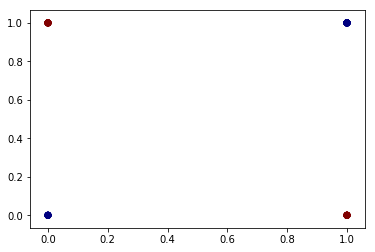

In [89]:
plot_dataset(X_test,Y_test)

# Real XOR



(2, 300)
(1, 300)


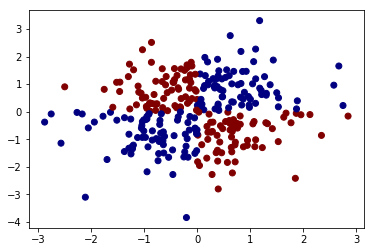

In [94]:
# Je créé un dataset de XOR

n_examples = 300
X = np.random.randn(2, 300)

mask1 = X[0, :] > 0
mask2 = X[1, :] > 0

Y = np.logical_xor(mask1, mask2) * 1.
Y = Y.reshape(1,-1)
plot_dataset(X,Y)

In [95]:
# Split train /test 

split_pct = 0.66

n_train = int(n_examples * split_pct)
n_test  = n_examples - n_train 

X_train = X[:, :n_train]
Y_train = Y[:, :n_train]

X_test = X[:, n_train:]
Y_test = Y[:, n_train:]


print(X_train.shape, X_test.shape)

(2, 198) (2, 102)


(2, 198)
(1, 198)


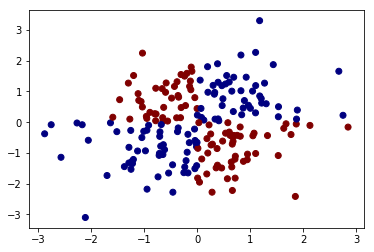

In [96]:
plot_dataset(X_train, Y_train)

(2, 102)
(1, 102)


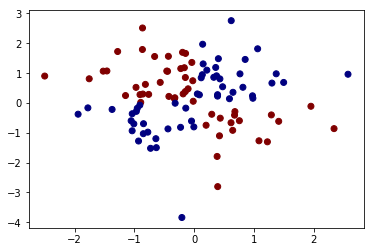

In [97]:
plot_dataset(X_test, Y_test)


Cost after iteration 0 : 0.8137757889543271

Cost after iteration 5000 : 0.5326713431161904

Cost after iteration 10000 : 0.5158518089630629

Cost after iteration 15000 : 0.5107684349260544

Cost after iteration 20000 : 0.5082342475772436

Cost after iteration 25000 : 0.5066818520604474

Cost after iteration 30000 : 0.5056180212194392

Cost after iteration 35000 : 0.5048353948955523

Cost after iteration 40000 : 0.5042307308550203

Cost after iteration 45000 : 0.5037465207717938

Train accuracy:  0.7666666666666667
(2, 198)
(1, 198)


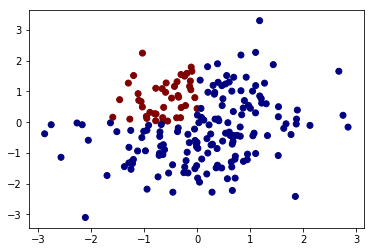

In [103]:
layer_dims=[X.shape[0],3,3,Y.shape[0]] 

params = nn_model(X,Y,layer_dims,
                 print_freq=5000,
                 num_iter=50000,
                 l_r=0.5)

Y_train_pred = predict(X_train, Y_train, params)
plot_dataset(X_train, Y_train_pred)

0.8235294117647058
(2, 102)
(1, 102)


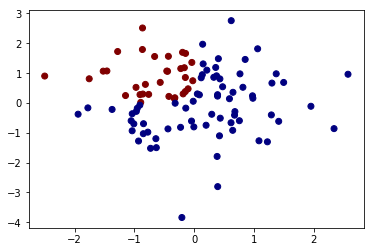

In [105]:
Y_test_pred = predict(X_test, Y_test, params)

print(accuracy(Y_test_pred, Y_test))

plot_dataset(X_test, Y_test_pred)

In [106]:
from sklearn.datasets import make_moons, make_circles, make_classification

In [110]:
X, y = make_moons(n_samples=200,
                  shuffle=True,
                  noise=0.1)

X = X.T 
Y = y.reshape(1,-1)

print(X.shape, Y.shape)

(2, 200) (1, 200)


(2, 200)
(1, 200)


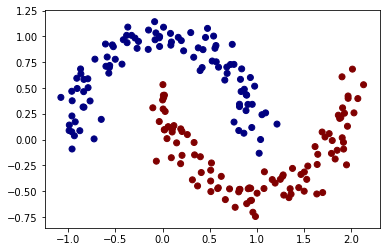

In [111]:
plot_dataset(X, Y)


Cost after iteration 0 : 0.7026456935230498

Cost after iteration 5000 : 0.5155585083990153

Cost after iteration 10000 : 0.45897508762853684

Cost after iteration 15000 : 0.44897098321350454

Cost after iteration 20000 : 0.4449370771985197

Cost after iteration 25000 : 0.4427379962246239

Cost after iteration 30000 : 0.44133702872961406

Cost after iteration 35000 : 0.44035632933573043

Cost after iteration 40000 : 0.43962545498507766

Cost after iteration 45000 : 0.4390560258932735

Cost after iteration 50000 : 0.43859747599725823

Cost after iteration 55000 : 0.4382186745474758

Cost after iteration 60000 : 0.437899338280384

Cost after iteration 65000 : 0.43762564168152224

Cost after iteration 70000 : 0.43738780819491396

Cost after iteration 75000 : 0.43717870998745406

Cost after iteration 80000 : 0.43699301399020984

Cost after iteration 85000 : 0.4368266394007557

Cost after iteration 90000 : 0.43667640052602913

Cost after iteration 95000 : 0.4365397638662624

Train accuracy

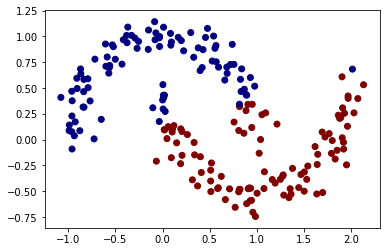

In [115]:
layer_dims=[X.shape[0],3,3,Y.shape[0]] 

params = nn_model(X,Y,layer_dims,
                 print_freq=5000,
                 num_iter=100000,
                 l_r=0.05)

Y_pred = predict(X, Y, params)
plot_dataset(X, Y_pred)